In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
train_path = "/content/drive/MyDrive/Data"

In [4]:
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [5]:
img_height, img_width = 254, 254
batch_size = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(
           train_path,
           subset="training",
           validation_split=0.3,
           seed=123,
           label_mode = 'categorical',
           image_size = (img_height, img_width),
            batch_size = batch_size
)


Found 1016 files belonging to 2 classes.
Using 712 files for training.


In [6]:
img_height, img_width = 254, 254
batch_size = 32
test_data = tf.keras.preprocessing.image_dataset_from_directory(
           train_path,
           subset="validation",
           validation_split=0.3,
           seed=123,
           label_mode = 'categorical',
           image_size = (img_height, img_width),
            batch_size = batch_size
)

Found 1016 files belonging to 2 classes.
Using 304 files for validation.


In [7]:
from keras.engine.sequential import Sequential
VGG19_model = Sequential()

default_model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape= (254,254, 3),
    pooling= 'avg',
    classes=2,
    classifier_activation="sigmoid",
)

VGG19_model.add(default_model)
VGG19_model.add(Flatten())
VGG19_model.add(Dense(512, activation='relu'))
VGG19_model.add(Dense(2, activation='sigmoid'))

80134624/80134624 [==============================] - 4s 0us/step


In [8]:
VGG19_model.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy',metrics=['accuracy'])

In [9]:
result = VGG19_model.fit(
           train_data,
           validation_data = test_data,
           epochs= 10
)

Epoch 1/10
23/23 [==============================] - 378s 12s/step - loss: 17.6961 - accuracy: 0.4831 - val_loss: 0.6929 - val_accuracy: 0.4704
Epoch 2/10
23/23 [==============================] - 18s 753ms/step - loss: 0.6989 - accuracy: 0.5618 - val_loss: 0.6883 - val_accuracy: 0.5362
Epoch 3/10
23/23 [==============================] - 18s 771ms/step - loss: 0.7136 - accuracy: 0.4944 - val_loss: 0.6914 - val_accuracy: 0.5329
Epoch 4/10
23/23 [==============================] - 18s 757ms/step - loss: 0.6735 - accuracy: 0.5716 - val_loss: 0.8007 - val_accuracy: 0.4704
Epoch 5/10
23/23 [==============================] - 18s 755ms/step - loss: 0.6966 - accuracy: 0.5140 - val_loss: 0.6868 - val_accuracy: 0.5296
Epoch 6/10
23/23 [==============================] - 18s 750ms/step - loss: 0.6762 - accuracy: 0.5674 - val_loss: 0.6464 - val_accuracy: 0.5625
Epoch 7/10
23/23 [==============================] - 18s 753ms/step - loss: 0.6532 - accuracy: 0.6671 - val_loss: 0.6318 - val_accuracy: 0.7072

In [10]:
import matplotlib.pyplot as plt

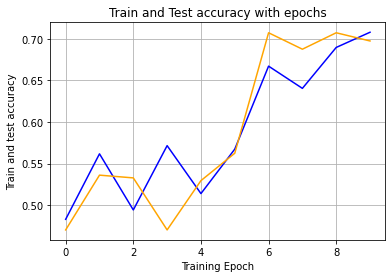

In [11]:
plt.plot(result.history['accuracy'], color='blue', label='train')
plt.plot(result.history['val_accuracy'], color ='orange', label='train')
plt.grid(True)
plt.title("Train and Test accuracy with epochs")
plt.xlabel("Training Epoch")
plt.ylabel("Train and test accuracy")
plt.show()

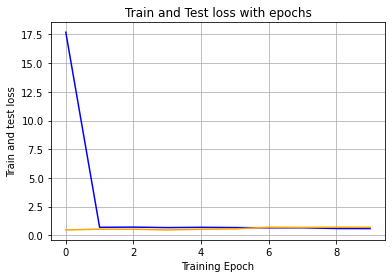

In [12]:
plt.plot(result.history['loss'], color='blue', label='train')
plt.plot(result.history['val_accuracy'], color ='orange', label='train')
plt.grid(True)
plt.title("Train and Test loss with epochs")
plt.xlabel("Training Epoch")
plt.ylabel("Train and test loss")
plt.show()